Final Project Submission

* Student name: Braydon Janecek
* Student pace: full time
* Scheduled project review date/time: TBD
* Instructor name: Abhineet Kulkarni
* Blog post URL: https://bcjanecek.github.io/how_to_approach_a_data_analysis_project


# Overview: Microsoft Movie Venture

## Goal and Approach
Use data available from public movie databases to determine what type of films have been most profitable in recent years. 

Approaching this project first requires adequate domain knowledge of the movie industry. Basic Google searches should provide sufficient information to begin to understand how a profitable film is made. Once this is understood we proceed to review our data and determine whether or not we have the relevant information we need to ask meaningful questions of our data. If data is unsufficient or low in quality it may be necessary to seek out more data. Given the approriate data, it is finally time to analyze our target variable, return on investment (ROI). With an understanding of our target variable and all the data we have available it is possible to formulate insightful questions whose answers may lead us to accomlishing our goal. 

## Questions Our Data Can Answer
1. Which producers are making the most profiable, recent movies based on median ROI per movie?
2. What genres are most profitable recently based on median ROI per movie?
3. What directors are making the most profitable, recent movies based on median ROI per movie?
4. Which production budget ranges yield the most profitable movies?

## Data Available

The first step here is to import any necessary libraries as shown below. 

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick
import sqlite3
import numpy as np

In [10]:
np.__version__

'1.16.2'

### Box Office Mojo

This data may be useful to find total gross revenue for films, however, we may have trouble joining with other tables due no title ID. Furthermore, TMDB budget table below has more useful data including budget. We will keep this dataframe here, however, it probably wil not be necessary. 

In [6]:
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### IMDB

This will likely prove to not be of any use. There are too many "primary_profession"s listed for each person and no way of knowing which role they played in each title. Again we will keep this here in case if proves useful for future analyses.

In [7]:
imdb_movie_makers = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_movie_makers.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


Again, not relevant to any questions posed. I will keep this here in case is proves useful in future analyses. 

In [8]:
imdb_international = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdb_international.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


The dataframe will be useful for identifying profitable movie genres.

In [9]:
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


This may be useful to find directors / writers who make profitable movies. However, the next table will be more useful by also including producers. 

In [10]:
imdb_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


This dataframe will be helpful in determing which producers and directors make the most profitable movies. 

In [11]:
imdb_characters = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_characters.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


This dataframe could be useful for determining a movie's popularity, however, as we are more concerned with profitability we will leave this here for future analyses. 

In [12]:
imdb_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


### Rotten Tomatoes

This dataframe appears to contain a lot of missing and otherwise redundant data. I will keep it here in case if proves useful in the future. 

In [13]:
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


I'm having problems opening this dataframe. 

In [14]:
#rt = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t')
#rt.head()

# can't get this one to open right now

### TMDB

This dataframe could be also be useful for determining a movie's popularity, however, as we are more concerned with profitability we will leave this here for future analyses.

In [15]:
tmdb_general = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdb_general.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


This is our KEY dataframe as it contains worldwide gross revenue and production budget - both of which are necessary in calculating net profits and ROI. 

In [16]:
tmdb_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tmdb_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Profitability and ROI of Recent Movies

Because our primary interest in entering the film production business is to make money I will focus on profitability, specificially ROI, as our primary movie success metric. Using a production budget independent variable will create a more even playing field between big studios with deep pockets and independent producers.

As we are interested in recent movie trends, we will narrow our scope of analysis to movies which have been produced in the past twenty years. The first step in doing this is to extract the year from the "release_date" column in our tmdb_budgets dataframe. 

In [17]:
tmdb_budgets['year'] = tmdb_budgets['release_date'].apply(lambda x: int(x[-4:]))
tmdb_budgets_recent = tmdb_budgets.query("year >= 2000")
tmdb_budgets_recent.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


Next we must convert the values in our "production_budget", "domestic_gross", and "worldwide_gross" columns so that we may perform mathematical operations on them. We will do this by removing the "$" and commas from these values, and then converting them from objects to float values. 

In [18]:
tmdb_budgets_recent['production_budget'] = tmdb_budgets_recent['production_budget'].map(lambda x: float(x[1:].replace(',', '')))
tmdb_budgets_recent['domestic_gross'] = tmdb_budgets_recent['domestic_gross'].map(lambda x: float(x[1:].replace(',', '')))
tmdb_budgets_recent['worldwide_gross'] = tmdb_budgets_recent['worldwide_gross'].map(lambda x: float(x[1:].replace(',', '')))
print(tmdb_budgets_recent.info())
tmdb_budgets_recent.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4387 entries, 0 to 5781
Data columns (total 7 columns):
id                   4387 non-null int64
release_date         4387 non-null object
movie                4387 non-null object
production_budget    4387 non-null float64
domestic_gross       4387 non-null float64
worldwide_gross      4387 non-null float64
year                 4387 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 274.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017


Now using worldwide gross and production budget we will create a new column for ROI. 

In [19]:
ROI_lambda = lambda row: row['worldwide_gross'] / row['production_budget']
tmdb_budgets_recent['ROI'] = tmdb_budgets_recent.apply(ROI_lambda, axis=1)
tmdb_budgets_recent.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,ROI
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009,6.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,2.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,0.427892
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,4.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,4.153696


To better visualize the distribution of ROI of our movies I will place these numerical values into bins. First we will need to define a function which we will be able to apply to the dataframe and sort each movie based on the "ROI" column. 

In [20]:
def ROI_bin(ROI):
    if ROI < 1:
        return "Unprofitable"
    elif 1 <= ROI <= 2.00:
        return "1.00-2.00x Return"
    elif 2.00 < ROI <= 3.00:
        return "2.00-3.00x Return"
    elif 3.00 < ROI <= 4.00:
        return "3.00-4.00x Return"
    elif 4.00 < ROI <= 5.00:
        return "4.00-5.00x Return"
    else:
        return "> 5.00x Return"

We will now use our new function to create a new column which shows the ROI bin for each movie. 

In [21]:
tmdb_budgets_recent['ROI_bin'] = tmdb_budgets_recent['ROI'].apply(ROI_bin)
tmdb_budgets_recent.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,ROI,ROI_bin
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009,6.532577,> 5.00x Return
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,2.546673,2.00-3.00x Return
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,0.427892,Unprofitable
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,4.243841,4.00-5.00x Return
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,4.153696,4.00-5.00x Return


We will now plot the frequency at which a movie will fall into each ROI bin.

In [22]:
ROI_grouped = tmdb_budgets_recent.ROI_bin.value_counts(normalize=True)
ROI_grouped

Unprofitable         0.389560
1.00-2.00x Return    0.182813
> 5.00x Return       0.149533
2.00-3.00x Return    0.138819
3.00-4.00x Return    0.085252
4.00-5.00x Return    0.054023
Name: ROI_bin, dtype: float64

Text(0.5, 1.0, 'Distribution of ROI of Films Since 2000')

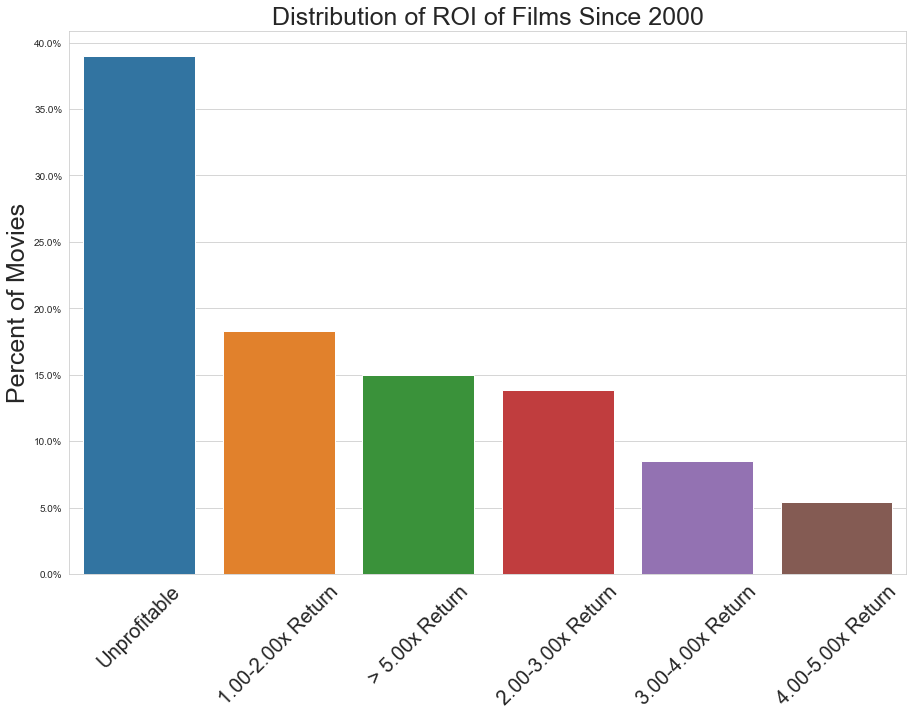

In [23]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x = ROI_grouped.index, y = ROI_grouped)
plt.ylabel('Percent of Movies', fontsize=25)
ax.set_xticklabels(['Unprofitable','1.00-2.00x Return', '> 5.00x Return', '2.00-3.00x Return', '3.00-4.00x Return', '4.00-5.00x Return', 'Unprofitable'], rotation='45', fontsize=20)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Distribution of ROI of Films Since 2000', fontsize=25)

Furthermore, we will investigate the summary statistics for ROI. It appears that the median movie has an approximately 1.5x ROI. 

In [24]:
tmdb_budgets_recent['ROI'].describe()

count    4387.000000
mean        3.360318
std        12.631185
min         0.000000
25%         0.402426
50%         1.544712
75%         3.402732
max       431.517853
Name: ROI, dtype: float64

# Most Profitable Genres

Here we wish to find out which genres are producing films with the highest median ROI. The answer to this question will prove useful in determining what type of films the studio should be producing.

Our first question deals with finding out which genres are most profitable. Becuase a movie could have various genres associated with it we will need to create a new row for each genre associated with each movie. For example, "genres" in the movie "Sunghursh" is described as "Action, Crime, Drama". The following code will split each genre using "," as the delimiter and "stack" the resulting rows on top of one another. 

First for simplicity we will create a copy of the "tmdb_budgets_recent" dataframe taking only the relevant columns.  

In [25]:
tmdb_budgets_recent2 = tmdb_budgets_recent[['movie', 'ROI']]
tmdb_budgets_recent2.head()

,movie,ROI
0,Avatar,6.532577
1,Pirates of the Caribbean: On Stranger Tides,2.546673
2,Dark Phoenix,0.427892
3,Avengers: Age of Ultron,4.243841
4,Star Wars Ep. VIII: The Last Jedi,4.153696


Next we will "stack" the rows as described previously. 

In [26]:
movie_genres = imdb_title_basics.set_index('primary_title').genres.str.split(',', expand=True).stack().reset_index('primary_title')
movie_genres.columns = ['movie', 'genre']
movie_genres.head()

,movie,genre
0,Sunghursh,Action
1,Sunghursh,Crime
2,Sunghursh,Drama
0,One Day Before the Rainy Season,Biography
1,One Day Before the Rainy Season,Drama


We will now merge our "tmdb_budgets_recent2" dataframe with our "movie_genres" dataframe. 

In [27]:
genres_profitability = movie_genres.merge(tmdb_budgets_recent2, how='left', on='movie')

We can see below that we have a lot of NaN values in our "ROI" column resulting from that merge. We will drop those rows. 

In [28]:
genres_profitability['ROI'].isna().value_counts()

True     222782
False      6986
Name: ROI, dtype: int64

In [29]:
genres_profitability = genres_profitability.dropna()

This is much better. 

In [30]:
genres_profitability.head()

,movie,genre,ROI
32,Foodfight!,Action,0.001638
33,Foodfight!,Animation,0.001638
34,Foodfight!,Comedy,0.001638
79,On the Road,Adventure,0.372532
80,On the Road,Drama,0.372532


Now we can view the median ROI for each movie genre. It appears that the "Animation" genre offers the highest returns. 

In [31]:
genres_profitability_grouped = genres_profitability.groupby('genre').ROI.agg('median').reset_index()
genres_profitability_grouped

,genre,ROI
0,Action,1.694849
1,Adventure,2.255682
2,Animation,2.779868
3,Biography,1.654205
4,Comedy,1.850371
5,Crime,1.193244
6,Documentary,1.303080
7,Drama,1.267374
8,Family,1.684496
9,Fantasy,1.763481


We can also sort these and find the top ten most profitable genres. 

In [32]:
most_profitable_genres = genres_profitability_grouped.sort_values('ROI', ascending=False).head(10)
most_profitable_genres

,genre,ROI
2,Animation,2.779868
1,Adventure,2.255682
18,Sci-Fi,2.196118
4,Comedy,1.850371
9,Fantasy,1.763481
12,Music,1.746344
0,Action,1.694849
17,Romance,1.685858
8,Family,1.684496
3,Biography,1.654205


Finally we can use boxplots to show the ROI distribution for each genre of movie. 

Text(0.5, 0, 'Genre')

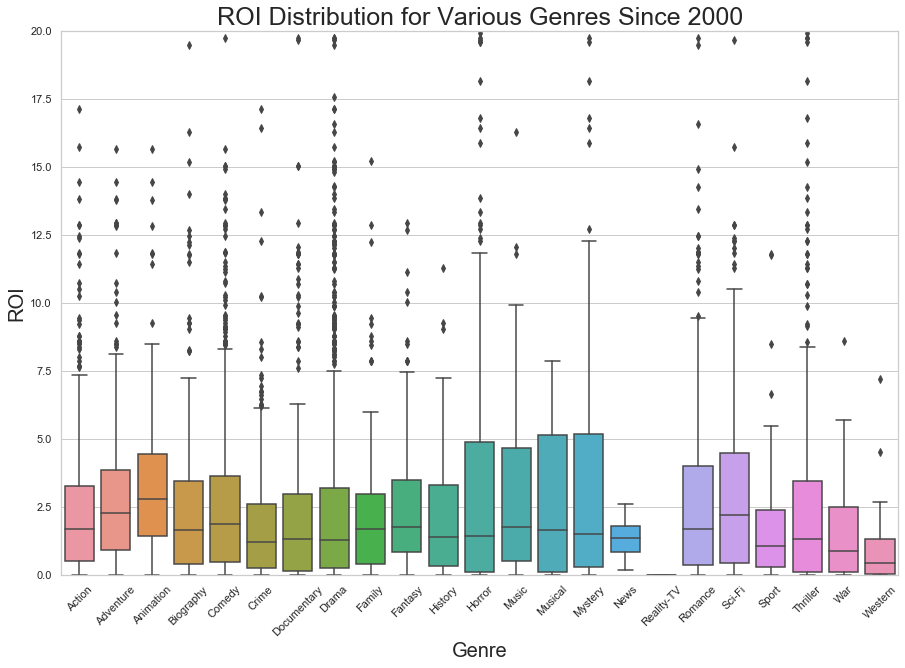

In [33]:
sns.set_context('notebook')
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.boxplot(x="genre", y="ROI", data=genres_profitability, order=genres_profitability_grouped['genre'])
ax.set(ylim=(0,20))
ax.set_xticklabels(genres_profitability_grouped['genre'], rotation=45)
plt.title('ROI Distribution for Various Genres Since 2000', fontsize=25)
ax.set_ylabel('ROI', fontsize=20)
ax.set_xlabel('Genre', fontsize=20)

# Most Profitable Producers

Movie producers are the financial lead in all film productions. Financial responsibilities include making sure the film stays at or under budget, and overseeing marketing and distribution decisions. Creatively speaking the producer usually selects the script and has the last word in the final cut. Clearly it is in a studio's best interest to be very strategic when selecting producers. 

We're only interested in producers / ex-producers and it appears that only the first two job titles below are relevant.

In [34]:
producers = imdb_characters.query("category == 'producer'")
producers['job'].value_counts().head(10)

producer                 108165
executive producer         4500
line producer               516
co-producer                 249
associate producer          140
co-executive producer        39
consulting producer          13
planner                      13
field producer               10
development executive         8
Name: job, dtype: int64

It is safe to drop all other values here using the following code. 

In [35]:
producers = producers[(producers['job'] == 'producer') | (producers['job'] == 'executive producer')]
producers.head()

,tconst,ordering,nconst,category,job,characters
2,tt0111414,3,nm3739909,producer,producer,NaN
9,tt0323808,6,nm0811056,producer,producer,NaN
10,tt0323808,7,nm0914939,producer,producer,NaN
20,tt0417610,7,nm0147416,producer,producer,NaN
21,tt0417610,8,nm0215732,producer,producer,NaN


We will now create a small dataframe using the columns we need from the "imdb_title_basics" table. This will be used to join with our producers table so that we have a title.

In [36]:
imdb_title_basics2 = imdb_title_basics[['tconst', 'primary_title']]
imdb_title_basics2.head()

,tconst,primary_title
0,tt0063540,Sunghursh
1,tt0066787,One Day Before the Rainy Season
2,tt0069049,The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh
4,tt0100275,The Wandering Soap Opera


We will now join this new table with our producers table. 

In [37]:
producers_with_title = producers.merge(imdb_title_basics2, how='left', on='tconst')
producers_with_title.head()

,tconst,ordering,nconst,category,job,characters,primary_title
0,tt0111414,3,nm3739909,producer,producer,NaN,A Thin Life
1,tt0323808,6,nm0811056,producer,producer,NaN,The Wicker Tree
2,tt0323808,7,nm0914939,producer,producer,NaN,The Wicker Tree
3,tt0417610,7,nm0147416,producer,producer,NaN,Asleep in the Sun
4,tt0417610,8,nm0215732,producer,producer,NaN,Asleep in the Sun


Great. Now we will join our "tmdb_budgets_recent2" dataframe with our "producers_with_title" dataframe so that the resulting dataframe contains the movie name, producer code (nconst), and ROI.

In [38]:
producers_profitability = tmdb_budgets_recent2.merge(producers_with_title, how='inner', left_on='movie', right_on='primary_title')
producers_profitability.head()

,movie,ROI,tconst,ordering,nconst,category,job,characters,primary_title
0,Avengers: Age of Ultron,4.243841,tt2395427,10,nm0270559,producer,producer,NaN,Avengers: Age of Ultron
1,The Dark Knight Rises,3.943415,tt1345836,10,nm0858799,producer,producer,NaN,The Dark Knight Rises
2,The Dark Knight Rises,3.943415,tt1345836,9,nm0746273,producer,producer,NaN,The Dark Knight Rises
3,Solo: A Star Wars Story,1.429641,tt3778644,10,nm0005086,producer,producer,NaN,Solo: A Star Wars Story
4,Solo: A Star Wars Story,1.429641,tt3778644,9,nm0004012,producer,producer,NaN,Solo: A Star Wars Story


As expected we lost some data from our "tmdb_budgets_recent2" dataframe due to the primary titles not matching up perfectly. However, we still have 1,789 unique producers and 3,072 unique films to analyze. 

In [39]:
producers_profitability.primary_title.nunique()

1789

In [40]:
producers_profitability.nconst.nunique()

3072

Now we're going to filter for producers which have produced at least two movies from our ROI dataframe. This will prevent skewing of results by a producer with one movie having an outstanding return. 

In [41]:
producers_profitability_multiple_movies = producers_profitability.groupby('nconst').filter(lambda x: len(x) > 2)

Now we're going to group our filtered dataframe by producer ID, solve for the median ROI for each producer, sort in descending order, and list the top producers. These are our producers which have produced at least three films listed and have a median ROI over 5.00x. Note here, that we cast the 'ROI' column in a list using an extra set of brackets. This will allow our resulting object to be a datframe rather than a series. 

In [42]:
top_producers_multiple_movies = producers_profitability_multiple_movies.query("ROI > 5").groupby('nconst')[['ROI']].median()
top_producers_multiple_movies.sort_values('ROI', ascending=False).reset_index()

,nconst,ROI
0,nm0143939,416.564740
1,nm0236026,89.586336
2,nm2720592,89.586336
3,nm0783652,89.586336
4,nm0542265,89.586336
...,...,...
184,nm0324556,5.116475
185,nm0381416,5.104287
186,nm1249995,5.064368
187,nm0335400,5.016736


In [43]:
producers_with_3_or_more_movies = len(producers_profitability_multiple_movies)
producers_with_ROI_over_5x = len(top_producers_multiple_movies)
print("We've narrowed down the producers we'd be interested in interviewing from {} producers to {} producers.".format(producers_with_3_or_more_movies, producers_with_ROI_over_5x))

We've narrowed down the producers we'd be interested in interviewing from 1642 producers to 189 producers.


Finally we will merge with our imdb_movie_makers table to find the names of top producers. 

In [44]:
top_producers_names = top_producers_multiple_movies.merge(imdb_movie_makers, on='nconst', how='left')

In [45]:
top_producers_names.head()

,nconst,ROI,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0000881,12.392765,Michael Bay,1965.0,NaN,"producer,director,actor","tt2109248,tt1055369,tt0117500,tt0120591"
1,nm0001060,8.524800,Chris Columbus,1958.0,NaN,"producer,writer,director","tt0241527,tt1454029,tt0295297,tt0294870"
2,nm0001845,12.606922,Forest Whitaker,1961.0,NaN,"actor,producer,director","tt0455590,tt1327773,tt1825683,tt0185183"
3,nm0004976,6.755918,Brian Grazer,1951.0,NaN,"producer,actor,writer","tt0268978,tt0367279,tt0088161,tt0112384"
4,nm0005219,25.482055,Mike Medavoy,1941.0,NaN,"producer,actor,executive","tt1130884,tt0482546,tt0443706,tt0947798"


Finally I'd like ot show a quick comparison of the ROI distribution for our preferred producers vs. all producers in the database. First we will find the median ROI for all producers in our producers_profitability dataframe. 

In [47]:
producers_median_profitability = producers_profitability.groupby('nconst')[['ROI']].median().reset_index()
producers_median_profitability.head()

,nconst,ROI
0,nm0000093,1.718013
1,nm0000108,0.513598
2,nm0000115,0.519762
3,nm0000123,3.566920
4,nm0000136,1.000265


Next we will create a list of producer codes from our top_producers_names['nconst'] data series.

In [48]:
top_producers_list = top_producers_names['nconst'].tolist()

Next we will define a function which ranks producers as "Tier 1" or "Tier 2" depending on whether or not they made the top prodcuers dataframe. 

In [49]:
def producer_tier(x):
    if x in top_producers_list:
        return "Tier 1"
    else:
        return "Tier 2"

No we will add a column to the producers_median_profitability dataframe which defines the tier of each producer. 

In [50]:
# first add a column for whether a producer is a top producer
producers_median_profitability['tier'] = producers_median_profitability['nconst'].apply(producer_tier)
producers_median_profitability.head()

,nconst,ROI,tier
0,nm0000093,1.718013,Tier 2
1,nm0000108,0.513598,Tier 2
2,nm0000115,0.519762,Tier 2
3,nm0000123,3.566920,Tier 2
4,nm0000136,1.000265,Tier 2


Finally we can visualize the ROI distributions for each of our tiers of producers using boxplots from Seaborn. There there are many outliers in the Tier 2 bracket, these are producers who may have had a one time success. Our Tier 1 bracket is showing only producers who have a track record of producers three or more recent films. 

Text(0.5, 1.0, 'Tier 1 vs. Tier 2 Producers Profitability')

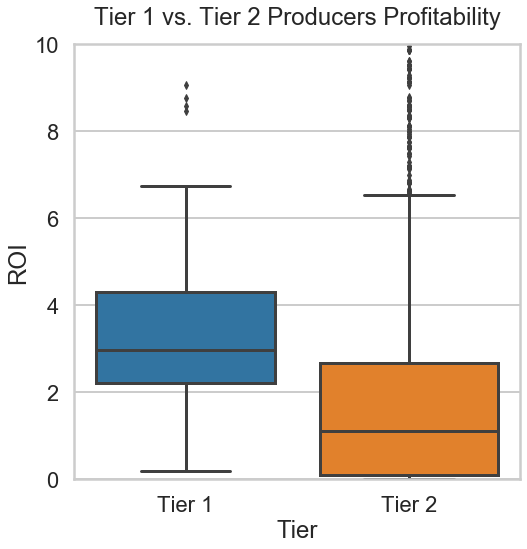

In [51]:
plt.figure(figsize=(8,8))
sns.set_context('poster')
ax = sns.boxplot(x='tier', y='ROI', data=producers_median_profitability, order=['Tier 1', 'Tier 2'])
ax.set(ylim=(0,10))
ax.set_xlabel("Tier")
ax.set_title("Tier 1 vs. Tier 2 Producers Profitability", pad=20)

# Most Profitable Directors

A director is defined by Wikipedia as:

"A film director controls a film's artistic and dramatic aspects and visualizes the screenplay (or script) while guiding the technical crew and actors in the fulfilment of that vision. The director has a key role in choosing the cast members, production design, and the creative aspects of filmmaking."

Obviously a director has a lot of pull in many aspects of making a movie and is required to make decisions which will ultimately affect the profitability of a movie. For example, a more artistically inclined director may make a decision to re-shoot a million dollar scene to make slight improvements which may not be a good decision financially speaking. Let's see which directors have struck a healthy balance between creating their artistic vision and maximizing ROI. 

It appears here that the "NaN" entries under the 'job' column imply the primary director so we will drop all rows where "job" is not "NaN". 

In [52]:
directors = imdb_characters.query("category == 'director'")
directors.head()

,tconst,ordering,nconst,category,job,characters
1,tt0111414,2,nm0398271,director,NaN,NaN
8,tt0323808,5,nm0362736,director,NaN,NaN
18,tt0417610,5,nm1145057,director,NaN,NaN
28,tt0469152,5,nm0707738,director,NaN,NaN
35,tt0473032,3,nm0776090,director,NaN,NaN


In [53]:
len(directors)

146393

Notice below that most other values under "job" are assistant directors.

In [54]:
directors['job'].value_counts().head(10)

co-director               5796
collaborating director     576
segment director           241
documentary director       163
creative director           78
supervising director        58
series director             52
second director             39
chief director              36
lead director               33
Name: job, dtype: int64

Using the following code we will drop all rows where job is not "NaN".

In [55]:
directors = directors[directors['job'].isna()]
directors.head()

,tconst,ordering,nconst,category,job,characters
1,tt0111414,2,nm0398271,director,NaN,NaN
8,tt0323808,5,nm0362736,director,NaN,NaN
18,tt0417610,5,nm1145057,director,NaN,NaN
28,tt0469152,5,nm0707738,director,NaN,NaN
35,tt0473032,3,nm0776090,director,NaN,NaN


From here on our process will be similar to that used in the previous question. First we will join our directors dataframe wit our "imdb_title_basics2" dataframe so that we have the names of the movies. 

In [56]:
directors_with_title = directors.merge(imdb_title_basics2, how='left', on='tconst')
directors_with_title.head()

,tconst,ordering,nconst,category,job,characters,primary_title
0,tt0111414,2,nm0398271,director,NaN,NaN,A Thin Life
1,tt0323808,5,nm0362736,director,NaN,NaN,The Wicker Tree
2,tt0417610,5,nm1145057,director,NaN,NaN,Asleep in the Sun
3,tt0469152,5,nm0707738,director,NaN,NaN,Smoking/Non-Smoking
4,tt0473032,3,nm0776090,director,NaN,NaN,Escape from Heaven


Great. Now we will join our "tmdb_budgets_recent2" dataframe with our "directors_with_title" dataframe so that the resulting dataframe contains the movie name, director code (nconst), and ROI.

In [57]:
directors_profitability = tmdb_budgets_recent2.merge(directors_with_title, how='inner', left_on='movie', right_on='primary_title')
directors_profitability.head()

,movie,ROI,tconst,ordering,nconst,category,job,characters,primary_title
0,Avatar,6.532577,tt1775309,5,nm3786927,director,NaN,NaN,Avatar
1,Pirates of the Caribbean: On Stranger Tides,2.546673,tt1298650,5,nm0551128,director,NaN,NaN,Pirates of the Caribbean: On Stranger Tides
2,Dark Phoenix,0.427892,tt6565702,5,nm1334526,director,NaN,NaN,Dark Phoenix
3,Avengers: Age of Ultron,4.243841,tt2395427,5,nm0923736,director,NaN,NaN,Avengers: Age of Ultron
4,Avengers: Infinity War,6.827114,tt4154756,5,nm0751577,director,NaN,NaN,Avengers: Infinity War


As expected we lost some data from our "tmdb_budgets_recent2" dataframe due to the primary titles not matching up perfectly. However, we still have 2,026 unique producers and 2,551 unique films to analyze.

In [58]:
directors_profitability.primary_title.nunique()

2026

In [59]:
directors_profitability.nconst.nunique()

2551

Now we're going to filter for directors which have directed at least two movies from our ROI dataframe. This will prevent skewing of results by a producer with one movie having an outstanding return. 

In [60]:
directors_profitability_multiple_movies = directors_profitability.groupby('nconst').filter(lambda x: len(x) > 2)

Now we're going to group our filtered dataframe by director ID, solve for the median ROI for each director, sort in descending order, and list the top directors. These are our directors which have directed at least three films listed and have a median ROI over 5.00x. Note here, that we cast the 'ROI' column in a list using an extra set of brackets. This will allow our resulting object to be a datframe rather than a series.

In [61]:
top_directors_multiple_movies = directors_profitability_multiple_movies.query("ROI > 5").groupby('nconst')[['ROI']].median()
top_directors_multiple_movies.sort_values('ROI', ascending=False).reset_index()

,nconst,ROI
0,nm7874205,89.586336
1,nm4688421,89.586336
2,nm0646895,89.586336
3,nm0688239,89.586336
4,nm0426333,89.586336
...,...,...
103,nm0569891,5.151181
104,nm0000318,5.127456
105,nm1012501,5.064368
106,nm0002700,5.031655


In [62]:
directors_with_3_or_more_movies = len(directors_profitability_multiple_movies)
directors_with_ROI_over_5x = len(top_directors_multiple_movies)
print("We've narrowed down the directors we'd be interested in interviewing from {} directors to {} directors.".format(directors_with_3_or_more_movies, directors_with_ROI_over_5x))

We've narrowed down the directors we'd be interested in interviewing from 615 directors to 108 directors.


Finally we will merge with our imdb_movie_makers table to find the names of top producers. 

In [63]:
top_directors_names = top_directors_multiple_movies.merge(imdb_movie_makers, on='nconst', how='left')
top_directors_names.head()

,nconst,ROI,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0000095,5.567073,Woody Allen,1935.0,NaN,"writer,director,actor","tt0091167,tt0079522,tt0075686,tt0097123"
1,nm0000108,11.437694,Luc Besson,1959.0,NaN,"writer,producer,director","tt2872732,tt0119116,tt0110413,tt0100263"
2,nm0000142,9.436662,Clint Eastwood,1930.0,NaN,"actor,producer,director","tt0405159,tt0105695,tt1205489,tt0112579"
3,nm0000318,5.127456,Tim Burton,1958.0,NaN,"producer,miscellaneous,director","tt0099487,tt0109707,tt0121164,tt0408236"
4,nm0000399,5.832569,David Fincher,1962.0,NaN,"director,producer,actor","tt1285016,tt2267998,tt0443706,tt0114369"


Finally I'd like ot show a quick comparison of the ROI distribution for our preferred directors vs. all directors in the database. First we will find the median ROI for all directors in our directors_profitability dataframe. 

In [64]:
directors_median_profitability = directors_profitability.groupby('nconst')[['ROI']].median().reset_index()
directors_median_profitability.head()

,nconst,ROI
0,nm0000095,5.416759
1,nm0000108,1.448804
2,nm0000110,4.311184
3,nm0000127,1.534419
4,nm0000142,2.295260


Next we will create a list of director codes from our top_producers_names['nconst'] data series.

In [65]:
top_directors_list = top_directors_names['nconst'].tolist()

Next we will define a function which ranks directors as "Tier 1" or "Tier 2" depending on whether or not they made the top directors dataframe. 

In [66]:
def director_tier(x):
    if x in top_directors_list:
        return "Tier 1"
    else:
        return "Tier 2"

No we will add a column to the producers_median_profitability dataframe which defines the tier of each producer. 

In [67]:
# first add a column for whether a producer is a top producer
directors_median_profitability['tier'] = directors_median_profitability['nconst'].apply(director_tier)
directors_median_profitability.head()

,nconst,ROI,tier
0,nm0000095,5.416759,Tier 1
1,nm0000108,1.448804,Tier 1
2,nm0000110,4.311184,Tier 2
3,nm0000127,1.534419,Tier 2
4,nm0000142,2.295260,Tier 1


Finally we can visualize the ROI distributions for each of our tiers of directors using boxplots from Seaborn. There there are many outliers in the Tier 2 bracket, these are directors who may have had a one time success. Our Tier 1 bracket is showing only directors who have a track record of producers three or more recent films. 

Text(0.5, 1.0, 'Tier 1 vs. Tier 2 Directors Profitability')

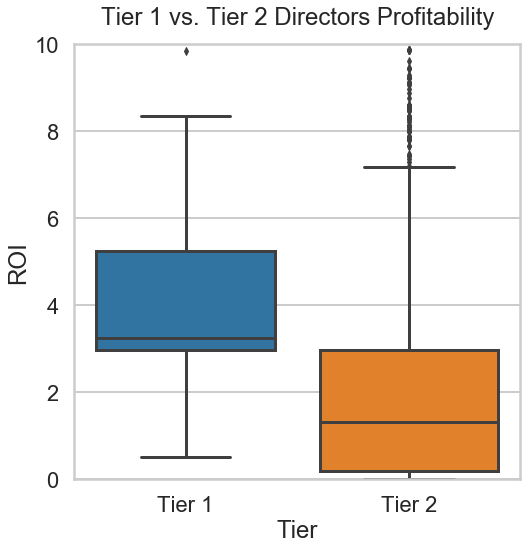

In [68]:
plt.figure(figsize=(8,8))
sns.set_context('poster')
ax = sns.boxplot(x='tier', y='ROI', data=directors_median_profitability, order=['Tier 1', 'Tier 2'])
ax.set(ylim=(0,10))
ax.set_xlabel("Tier")
ax.set_title("Tier 1 vs. Tier 2 Directors Profitability", pad=20)

# Production Budgets with Most Profitable Movies

Are films with higher production budgets profitable more often than films with lower production budgets? Knowing the answer to this question could help with the risk management involved in financing a movie. 

To solve this first we will write a function creating bins for various movie ranges. 

In [69]:
def production_budget_bin(production_budget):
    if production_budget < 10000000:
        return "< $10MM"
    elif 10000000 <= production_budget <= 25000000:
        return "$10-25MM"
    elif 25000000 <= production_budget <= 50000000:
        return "$25-50MM"
    elif 50000000 < production_budget <= 75000000:
        return "$50-75MM"
    elif 7500000 < production_budget <= 100000000:
        return "$75-100MM"
    else:
        return "> $100MM"

Next we create a new column labeling each movie with it's production budget range. 

In [70]:
tmdb_budgets_recent['PB_bin'] = tmdb_budgets_recent['production_budget'].apply(production_budget_bin)
tmdb_budgets_recent.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,ROI,ROI_bin,PB_bin
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009,6.532577,> 5.00x Return,> $100MM
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,2.546673,2.00-3.00x Return,> $100MM
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,0.427892,Unprofitable,> $100MM
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,4.243841,4.00-5.00x Return,> $100MM
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,4.153696,4.00-5.00x Return,> $100MM


Next we will create a column which tells us whether or not a movie was profitable as defined by it's ROI. 

In [71]:
tmdb_budgets_recent['profitable'] = tmdb_budgets_recent['ROI'].apply(lambda x: "Yes" if x>1 else "No")
tmdb_budgets_recent.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,ROI,ROI_bin,PB_bin,profitable
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009,6.532577,> 5.00x Return,> $100MM,Yes
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,2.546673,2.00-3.00x Return,> $100MM,Yes
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,0.427892,Unprofitable,> $100MM,No
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,4.243841,4.00-5.00x Return,> $100MM,Yes
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,4.153696,4.00-5.00x Return,> $100MM,Yes


While it would be possible to visualize the ratio of profitable films for each production budget using a series of pie charts, Microsoft Excel has a better built-in graphing solution that is perfect for these types of comparisons. We will no export this pandas dataframe into an Excel table for this visualization. After a quick conversion to a pivot table in Excel, we're able to to plot up a 100% stacked bar chart to compare. 

In [72]:
# the below code was used to export the dataframe to an Excel sheet. It has been commented out as the export is complete
# tmdb_budgets_recent.to_excel("TMDB_budgets_recent.xlsx")  

As we can see below, the data suggests that higher production budgets result in a higher likelihood of a movie being profitable. 

<img src="profitability_by_production_budget3.png">

# Conclusion: Recommendations and Further Studies

## Recommendations

### What Type of Movies to Make

Based on data available the following ten genres are the most profitable (based on median ROI of post-2000 films analyzed) sorted from highest to lowest ROI. These are the genre films I recommend making. 

In [73]:
most_profitable_genres

,genre,ROI
2,Animation,2.779868
1,Adventure,2.255682
18,Sci-Fi,2.196118
4,Comedy,1.850371
9,Fantasy,1.763481
12,Music,1.746344
0,Action,1.694849
17,Romance,1.685858
8,Family,1.684496
3,Biography,1.654205


### Who to Hire to Make Them

The following lists of directors and producers would be a good place to start looking when it comes time to hire. Each of these candidates have produced or directed at least three films (that we have data on) and their films median ROI has been over 5.00x. 

In [74]:
top_producers_names[['primary_name']]

,primary_name
0,Michael Bay
1,Chris Columbus
2,Forest Whitaker
3,Brian Grazer
4,Mike Medavoy
...,...
184,James Weaver
185,Eli Bush
186,Buddy Patrick
187,Anders Granström


In [75]:
top_directors_names[['primary_name']]

,primary_name
0,Woody Allen
1,Luc Besson
2,Clint Eastwood
3,Tim Burton
4,David Fincher
...,...
103,Anne Klint
104,Asaf Lavi Harel
105,Ryan Lee
106,Ruby Klein


### How Much to Spend On Them

Based on our data analysis, it appears that films with budgets over 100 million USD have over a 90% probability of being profitable. This is a stark contrast to films with budgets less than 10 million USD which have barely over a 40% chance of being profitable. 

## Further Studies

### Deeper Dive Into Movie Finances

Hollywood has proven to be notorious for skewing, or otherwise being secretive about, the financial data of their films. One problem with the data we had available in this study is that we are only given the production budget for these movies. While useful this number does not account for other expenses relating to distribution such as the theater's cut, advertising, and marketing. Given more reliable financial data which includes promotional budgets, as well as perhaps other sources of revenue such as instant video rentals, would help us better answer the questions posed above.

### Distribution Model

Answering the question "what type of movies should we be producing" in this analysis depends on the very important assumption that Microsoft intends on producing these movies with the intent to premier them in theaters where they will make the majority of their revenue. The success metrics would likely be very different if the goal were to say - launch a subscriber based video streaming service. If that were the case then a likely success metric would be viewer counts, or movie popularity to put it more broadly. In which case then it would be time to search for the best metrics for determining the "trending-worthiness" of a movie or mini series. 

Somewhat unrelated, I was curious what if any correlation there was between movie popularity and profitability and explored this very briefly in the appendix of this notebook. 

### Preferred Genres of Producers / Directors

It would be helpful to analyze what type of movies our chosen producers / directors are accustomed to working on. Furthermore, we could look at our top ten profitable genres and see which directors and producers have the most experience working on films of each genre.

# Appendix

## Popularity vs. Profitability? 

We mentioned earlier that we are primarily interested in gauging the success of movies in terms of profitability, and that remains true assuming that Microsoft's business model is to create movies and premier them in theaters. However, if Microsoft decided they were interested in creating their own content streaming provider (such as Netflix) they may be more interested in creating "binge-worthy", "trending-worthy" content which turns people into subscribers. Can we assume that a profitable movie implies that it is a popular movie? The answer to this question may prove useful in further analyses. 

For this question we will measure profitability in terms of worldwise gross revenue. While number of reviews from internet databases such as IMDB and TMDB may indicate a movie's popularity, these metrics are also affected by the popularity of the websites themselves. Gross worldwide revenue is by no means a perfect metric for a movie's popularity due to annual fluctuations in popularity for going to the movie theater, inflation, etc. However, for a quick analysis it is the best metric we have available. 

By plotting ROI against worldwide gross revenue we can see that there apears to be a slight, positive correlation. This could possibly suggest that some of the factors that make a movie profitable could also make it popular. 

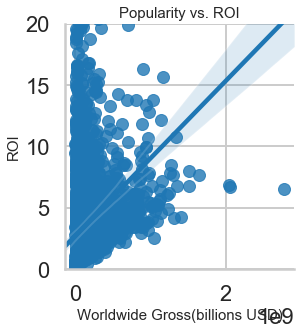

In [76]:
lm = sns.lmplot(x="worldwide_gross", y="ROI", data=tmdb_budgets_recent, sharex=False, sharey=False)
axes = lm.axes
plt.title('Popularity vs. ROI', fontsize=15)
plt.xlabel("Worldwide Gross(billions USD)", fontsize=15)
plt.ylabel("ROI", fontsize=15)
axes[0,0].set_ylim(0,20)
sns.set_context('poster')

## Genre Popularity Trends

Being curious about which genres and increasing or decreasing in popularity I sought to create a quick visualization. This may help our studio be aware of any emerging trends of where movie-goers are spending their money. 

First we will create a new table out of "tmdb_budgets_recent" with only the columns we're interested in analyzing. As a reminder, with a lack of a better metric, we will be using worldwide gross revenue as our measure of a movie's popularity. 

In [77]:
tmdb_budgets_recent3 = tmdb_budgets_recent[['movie', 'worldwide_gross', 'year']]
tmdb_budgets_recent3.head()

,movie,worldwide_gross,year
0,Avatar,2.776345e+09,2009
1,Pirates of the Caribbean: On Stranger Tides,1.045664e+09,2011
2,Dark Phoenix,1.497624e+08,2019
3,Avengers: Age of Ultron,1.403014e+09,2015
4,Star Wars Ep. VIII: The Last Jedi,1.316722e+09,2017


We will now merge this into our previously creating "movie_genres" dataframe.

In [78]:
genres_popularity = movie_genres.merge(tmdb_budgets_recent3, how='left', on='movie')
genres_popularity.head()

,movie,genre,worldwide_gross,year
0,Sunghursh,Action,NaN,NaN
1,Sunghursh,Crime,NaN,NaN
2,Sunghursh,Drama,NaN,NaN
3,One Day Before the Rainy Season,Biography,NaN,NaN
4,One Day Before the Rainy Season,Drama,NaN,NaN


We have many "NaN" values here so we will drop those with the following code. 

In [79]:
genres_popularity['worldwide_gross'].isna().value_counts()

True     222782
False      6986
Name: worldwide_gross, dtype: int64

In [80]:
genres_popularity = genres_popularity.dropna()
genres_popularity.head()

,movie,genre,worldwide_gross,year
32,Foodfight!,Action,73706.0,2012.0
33,Foodfight!,Animation,73706.0,2012.0
34,Foodfight!,Comedy,73706.0,2012.0
79,On the Road,Adventure,9313302.0,2013.0
80,On the Road,Drama,9313302.0,2013.0


To make the graph easier to analyze we will filter the above dataframe to only show our top ten most profitable film genres. First we will make a list of our top ten genres. 

In [82]:
top_genres_list = most_profitable_genres['genre'].tolist()

Next we will write a function to determine whether or not a genre is in our top ten genres list.

In [83]:
def top_genre(x):
    if x in top_genres_list:
        return "Yes"
    else:
        return "No"

Now we will add a column which tells us whether or not a genre is in our top genres list. 

In [84]:
genres_popularity['top_genre'] = genres_popularity['genre'].apply(top_genre)
genres_popularity.head()

,movie,genre,worldwide_gross,year,top_genre
32,Foodfight!,Action,73706.0,2012.0,Yes
33,Foodfight!,Animation,73706.0,2012.0,Yes
34,Foodfight!,Comedy,73706.0,2012.0,Yes
79,On the Road,Adventure,9313302.0,2013.0,Yes
80,On the Road,Drama,9313302.0,2013.0,No


Now we will create a new dataframe which contains only movies from our top genres list.

In [90]:
genres_popularity_top_genres = genres_popularity.query("top_genre == 'Yes'")
genres_popularity_top_genres['genre'].value_counts()

Comedy       776
Action       651
Adventure    457
Romance      332
Biography    227
Sci-Fi       211
Fantasy      177
Family       173
Animation    135
Music         80
Name: genre, dtype: int64

Finally we can group these together by genre and year, and sum all worldwide gross revenue for each year/genre. 

In [91]:
top_genres_popularity_grouped = genres_popularity_top_genres.groupby(['genre', 'year'])[['worldwide_gross']].sum().reset_index()

We may now graph this as a line plot to determine which of our most profitable genres are becoming more popular, or losing popularity. 

[Text(0, 0, '0.00 Billion'),
 Text(0, 0, '2.50 Billion'),
 Text(0, 0, '5.00 Billion'),
 Text(0, 0, '7.50 Billion'),
 Text(0, 0, '10.00 Billion'),
 Text(0, 0, '12.50 Billion'),
 Text(0, 0, '15.00 Billion'),
 Text(0, 0, '17.50 Billion'),
 Text(0, 0, '20.00 Billion')]

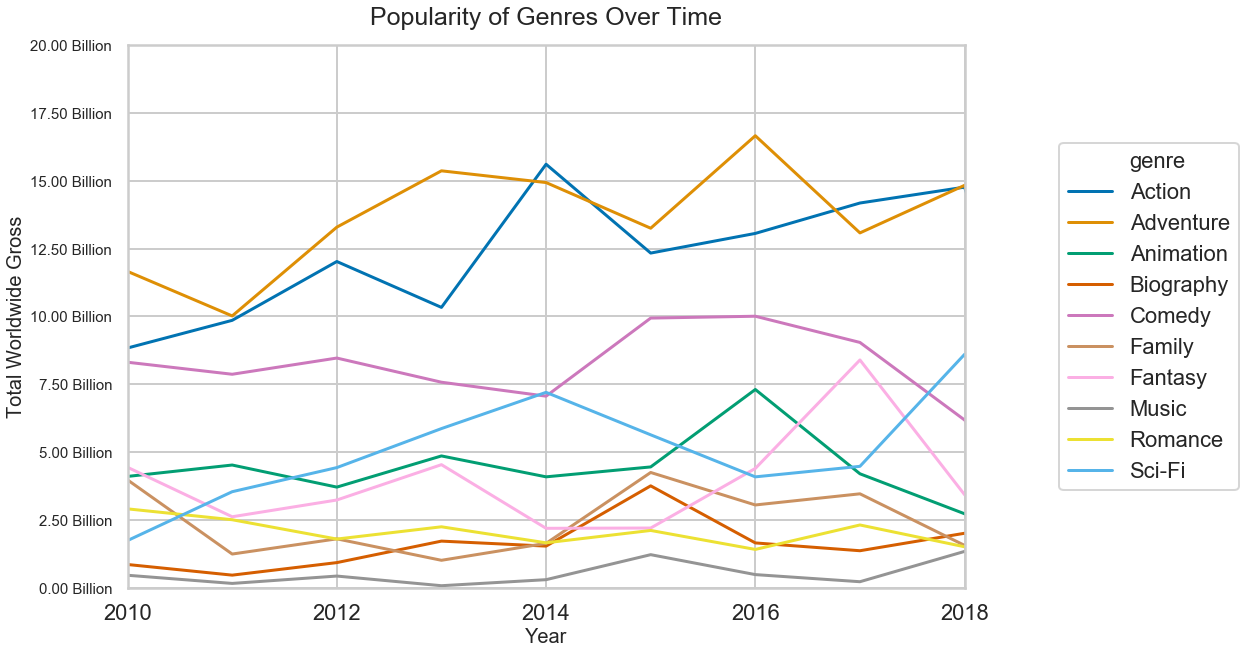

In [92]:
sns.set_palette("colorblind")
plt.figure(figsize=(15,10))

ax = sns.lineplot(x="year", y="worldwide_gross", hue="genre", palette='colorblind',
                  data=top_genres_popularity_grouped)

ax.set_xticks(range(2000,2020,2))
ax.set(xlim=(2010,2018))

ax.set_ylabel("Total Worldwide Gross", fontsize=20)
ax.set_xlabel("Year", fontsize=20)
ax.set_title("Popularity of Genres Over Time", fontsize=25, pad=20)
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), ncol=1)

ax.set(ylim=(0,20000000000))
ylabels = ['{:,.2f}'.format(x) + ' Billion' for x in ax.get_yticks()/1000000000]
ax.set_yticklabels(ylabels, fontsize=15)